<a href="https://colab.research.google.com/github/Flammingo2/TensorFlow/blob/main/homework5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [49]:
import numpy as np
%tensorflow_version 2.x
import tensorflow as tf
import matplotlib.pyplot as plt
import tensorflow_datasets as tfds

In [50]:
# Load dataset, split into test and training data
train_ds, test_ds = tfds.load('cifar10', split= ['train', 'test'], as_supervised=True)

In [51]:
def overview_data():
  train_ds_numpy = tfds.as_numpy(train_ds)
  test_ds_numpy = tfds.as_numpy(test_ds)

  #Look at shapes images and labels of dataset
  print(len(train_ds))
  print(len(test_ds))

  x = 0
  for i in train_ds_numpy:
    x += 1
    print(format(i[0].shape))
    print(np.amax(i[0]))
    print(np.amin(i[0]))
    print(format(i[1]))
    if x== 5:
      break

  x = 0
  for i in test_ds_numpy:
    x += 1
    print(format(i[0].shape))
    print(np.amax(i[0]))
    print(np.amin(i[0]))
    print(format(i[1]))
    if x== 5:
      break

In [52]:
def plot_data():
  train_ds_numpy = tfds.as_numpy(train_ds)
  test_ds_numpy = tfds.as_numpy(test_ds)

  # Plot 5 samples with their corresponding label.
  fig, ax = plt.subplots(1,5)
  x = 0
  for j in train_ds_numpy:
    
    # Readout an image and the corresponding label.
    img = j[0]

    label = {
        0 : 'airplane',
        1 : 'automobile',
        2 : 'bird',
        3 : 'cat',
        4 : 'deer',
        5 : 'dog',
        6 : 'frog',
        7 : 'horse',
        8 : 'ship',
        9 : 'truck'
    }
    # if label is still just an integer
    if isinstance(j[1], np.int64)  :
      lbl = label[j[1]]
    # if label is already an one-hot vektor
    else:
      indice = np.where(j[1] == 1)
      indice = indice[0]
      lbl = label[int(indice)]

    ax[x].imshow(img)
    ax[x].set_title(lbl)
    ax[x].axis("off")

    x += 1

    if x==5:
      break

50000
10000
(32, 32, 3)
249
0
7
(32, 32, 3)
249
5
8
(32, 32, 3)
172
54
4
(32, 32, 3)
247
10
4
(32, 32, 3)
209
8
6
(32, 32, 3)
255
5
7
(32, 32, 3)
255
0
0
(32, 32, 3)
225
6
6
(32, 32, 3)
255
58
9
(32, 32, 3)
246
0
5


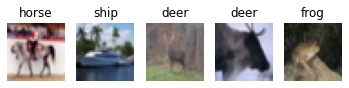

In [53]:
overview_data()
plot_data()

In [54]:
#Build input pipeline
train_ds = train_ds.map(lambda image, label: (tf.image.per_image_standardization(tf.cast(image, tf.float32)), tf.reshape(tf.one_hot(label, 10), (-1,))))
test_ds = test_ds.map(lambda image, label: (tf.image.per_image_standardization(tf.cast(image, tf.float32)), tf.reshape(tf.one_hot(label, 10), (-1,))))
#(image/255)*2 -1 

/usr/local/lib/python3.6/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


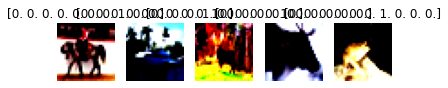

In [55]:
# Plot 5 samples with their corresponding label.
fig, ax = plt.subplots(1,5)
train_ds_numpy = tfds.as_numpy(train_ds)
test_ds_numpy = tfds.as_numpy(test_ds)
x = 0
for j in train_ds_numpy:
  
  # Readout an image and the corresponding label.
  img = j[0]
  lbl = j[1]

  ax[x].imshow(img)
  ax[x].set_title(lbl)
  ax[x].axis("off")

  x += 1

  if x==5:
    break

50000
10000
(32, 32, 3)
1.6242564
-2.2864254
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(32, 32, 3)
2.317584
-1.7136855
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
(32, 32, 3)
3.1003594
-3.4322746
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
(32, 32, 3)
1.9314102
-1.4442297
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
(32, 32, 3)
3.0144625
-1.3146421
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(32, 32, 3)
1.3148377
-1.5812476
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
(32, 32, 3)
3.6264737
-1.5439444
[1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
(32, 32, 3)
2.993287
-2.1075056
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
(32, 32, 3)
0.97097623
-2.2548826
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
(32, 32, 3)
1.5621185
-1.38555
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


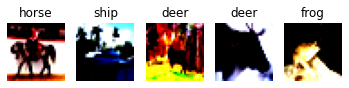

In [56]:
overview_data()
plot_data()

In [57]:
# batching, shuffle und prefetching
train_ds = train_ds.batch(64).shuffle(buffer_size=64).prefetch(128)
test_ds = test_ds.batch(64).shuffle(buffer_size=64).prefetch(128)

In [58]:
from tensorflow.keras import Model
from tensorflow.keras.layers import Layer

class Model(Model): 
    
    def __init__(self):
        super(Model, self).__init__()
        # Define the layers.
        #Convolutional layers (conv2d (with regularization(L2)) + pooling + dropout)
        self.convolution_layer_1 = tf.keras.layers.Conv2D(filters=32,
                                                     kernel_size=3,
                                                     strides=(1,1),
                                                     padding='same',
                                                     activation=tf.keras.activations.relu,
                                                     input_shape=(64,32,32,3),
                                                     kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None),
                                                     activity_regularizer=tf.keras.regularizers.L2(0.01)
                                               )
        self.dropout_layer_1 = tf.keras.layers.Dropout(.5, input_shape=(2,))


        self.convolution_layer_2 = tf.keras.layers.Conv2D(filters = 8,
                                                   kernel_size=3,
                                                   strides=(1,1),
                                                   padding= 'same',
                                                   activation=tf.keras.activations.relu,
                                                   kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None),
                                                   activity_regularizer=tf.keras.regularizers.L2(0.01)
                                               )
        self.dropout_layer_2 = tf.keras.layers.Dropout(.5, input_shape=(2,))


        self.convolution_layer_3 = tf.keras.layers.Conv2D(filters = 8,
                                                   kernel_size=3,
                                                   strides=(1,1),
                                                   padding= 'same',
                                                   activation=tf.keras.activations.relu,
                                                   kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None),
                                                   activity_regularizer=tf.keras.regularizers.L2(0.01)
                                               )
        self.max_pool_layer_1 = tf.keras.layers.MaxPool2D(pool_size=(3,3),
                                                        strides=(2,2)                                         
                                               )
        self.dropout_layer_3 = tf.keras.layers.Dropout(.5, input_shape=(2,))


        self.convolution_layer_4 = tf.keras.layers.Conv2D(filters = 8,
                                                   kernel_size=3,
                                                   strides=(1,1),
                                                   padding= 'same',
                                                   activation=tf.keras.activations.relu,
                                                   kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None),
                                                   activity_regularizer=tf.keras.regularizers.L2(0.01)
                                               )
        self.dropout_layer_4 = tf.keras.layers.Dropout(.5, input_shape=(2,))


        self.convolution_layer_5 = tf.keras.layers.Conv2D(filters = 8,
                                                   kernel_size=3,
                                                   strides=(1,1),
                                                   padding= 'same',
                                                   activation=tf.keras.activations.relu,
                                                   kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None),
                                                   activity_regularizer=tf.keras.regularizers.L2(0.01)
                                               )
        self.max_pool_layer_2 = tf.keras.layers.MaxPool2D(pool_size=(3,3),
                                                        strides=(2,2)                                         
                                               )
        self.dropout_layer_5 = tf.keras.layers.Dropout(.5, input_shape=(2,))


        self.convolution_layer_6 = tf.keras.layers.Conv2D(filters = 8,
                                                   kernel_size=3,
                                                   strides=(1,1),
                                                   padding= 'same',
                                                   activation=tf.keras.activations.relu,
                                                   kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None),
                                                   activity_regularizer=tf.keras.regularizers.L2(0.01)
                                               )
        #Global Average Pooling layer
        self.global_pooling_layer = tf.keras.layers.GlobalAveragePooling2D()

        # hidden layer + output layer
        self.hidden_layer = tf.keras.layers.Dense(units=64,
                                                  activation=tf.keras.activations.sigmoid, 
                                                  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None),
                                                  activity_regularizer=tf.keras.regularizers.L2(0.01)
                                                  )
        self.dropout_layer_6 = tf.keras.layers.Dropout(.5, input_shape=(2,))


        self.output_layer = tf.keras.layers.Dense(units=10, 
                                                  activation=tf.keras.activations.softmax,
                                                  kernel_initializer=tf.keras.initializers.RandomNormal(mean=0.0, stddev=1, seed=None),
                                                  activity_regularizer=tf.keras.regularizers.L2(0.01)
                                                  )

    def call(self, x, training=True):
        # Define the forward step.
        x = self.convolution_layer_1(x)
        x = self.dropout_layer_1(x)

        x = self.convolution_layer_2(x)
        x = self.dropout_layer_2(x)

        x = self.convolution_layer_3(x)
        x = self.max_pool_layer_1(x)
        x = self.dropout_layer_3(x)

        x = self.convolution_layer_4(x)
        x = self.dropout_layer_4(x)

        x = self.convolution_layer_5(x)
        x = self.max_pool_layer_2(x)
        x = self.dropout_layer_5(x)

        x = self.convolution_layer_6(x)

        x = self.global_pooling_layer(x)
        x = self.hidden_layer(x)
        x = self.dropout_layer_6(x)
        x = self.output_layer(x)
        
        return x

In [59]:
def train_step(model, input, target, loss_function, optimizer):
  # loss_object and optimizer_object are instances of respective tensorflow classes
  with tf.GradientTape() as tape:
    prediction = model(input, training=True)
    # Introduce Regularization
    loss = loss_function(target, prediction) + tf.reduce_sum(model.losses)
    gradients = tape.gradient(loss, model.trainable_variables)
  optimizer.apply_gradients(zip(gradients, model.trainable_variables))
  return loss 

def test(model, test_data, loss_function, training=False):
  # test over complete test data
  test_accuracy_aggregator = []
  test_loss_aggregator = []

  for (input, target) in test_data:
    prediction = model(input)
    sample_test_loss = loss_function(target, prediction)
    sample_test_accuracy =  np.argmax(target, axis=1) == np.argmax(prediction, axis=1)
    sample_test_accuracy = np.mean(sample_test_accuracy)
    test_loss_aggregator.append(sample_test_loss.numpy())
    test_accuracy_aggregator.append(np.mean(sample_test_accuracy))

  test_loss = np.mean(test_loss_aggregator)
  test_accuracy = np.mean(test_accuracy_aggregator)

  return test_loss, test_accuracy

Epoch: __ 0


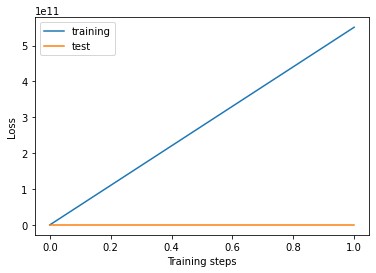

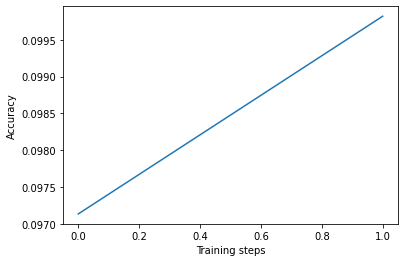

Epoch: __ 1


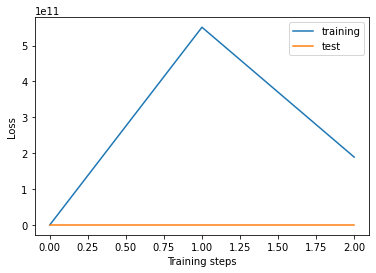

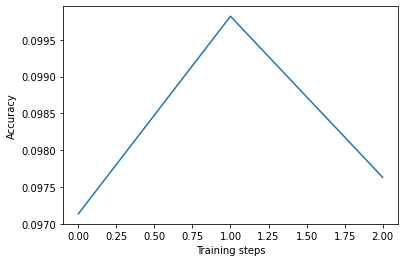

Epoch: __ 2


In [ ]:
tf.keras.backend.clear_session()

### Hyperparameters
num_epochs = 10
learning_rate = 0.0001
running_average_factor = 0.95

# Initialize the model.
model = Model()
# Initialize the loss: categorical cross entropy. Check out 'tf.keras.losses'.
cross_entropy_loss = tf.keras.losses.CategoricalCrossentropy()
# Initialize the optimizer: Adam with default parameters. Check out 'tf.keras.optimizers'
optimizer = tf.keras.optimizers.Adam(learning_rate)

# Initialize lists for later visualization.
train_losses = []

test_losses = []
test_accuracies = []

#testing once before we begin
test_loss, test_accuracy = test(model, test_ds, cross_entropy_loss)
test_losses.append(test_loss)
test_accuracies.append(test_accuracy)

#check how model performs on train data once before we begin
train_loss, _ = test(model, train_ds, cross_entropy_loss)
train_losses.append(train_loss)

# We train for num_epochs epochs.
for epoch in range(num_epochs):
    print('Epoch: __ ' + str(epoch))

    train_ds = train_ds.shuffle(buffer_size=128)
    test_ds = test_ds.shuffle(buffer_size=128)

    #training (and checking in with training)
    running_average = 0
    for (input,target) in train_ds:
        train_loss = train_step(model, input, target, cross_entropy_loss, optimizer)
        running_average = running_average_factor * running_average  + (1 - running_average_factor) * train_loss
    train_losses.append(running_average)

    #testing
    test_loss, test_accuracy = test(model, test_ds, cross_entropy_loss)
    test_losses.append(test_loss)
    test_accuracies.append(test_accuracy)

    # Visualize accuracy and loss for training and test data. 
    # One plot training and test loss.
    # One plot training and test accuracy.
    plt.figure()
    line1, = plt.plot(train_losses)
    line2, = plt.plot(test_losses)
    plt.xlabel("Training steps")
    plt.ylabel("Loss")
    plt.legend((line1,line2),("training","test"))
    plt.show()

    plt.figure()
    line1, = plt.plot(test_accuracies)
    plt.xlabel("Training steps")
    plt.ylabel("Accuracy")
    plt.show()

In [ ]:
# Visualize accuracy and loss for training and test data. 
# One plot training and test loss.
# One plot training and test accuracy.
plt.figure()
line1, = plt.plot(train_losses)
line2, = plt.plot(test_losses)
plt.xlabel("Training steps")
plt.ylabel("Loss")
plt.legend((line1,line2),("training","test"))
plt.show()

plt.figure()
line1, = plt.plot(test_accuracies)
plt.xlabel("Training steps")
plt.ylabel("Accuracy")
plt.show()

In [ ]:
#Save model
model.save_weights('Malaria.h5')

NameError: ignored